## Glass dataset

###### Prepare a model for glass classification using KNN

Data Description:
RI : refractive index, Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10),          Mg: Magnesium,AI: Aluminum,Si:Silicon,K:Potassium,Ca: Calcium,Ba: Barium,Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
glass = pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
glass.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [6]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

<AxesSubplot:>

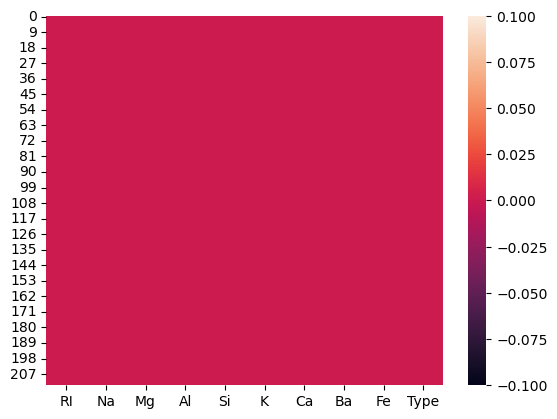

In [7]:
import seaborn as sns
col = glass.columns
sns.heatmap(glass.isnull())

In [8]:
glass.shape

(214, 10)

In [9]:
glass[glass.duplicated()].shape

(1, 10)

In [10]:
glass = glass.drop_duplicates()

In [11]:
glass.shape

(213, 10)

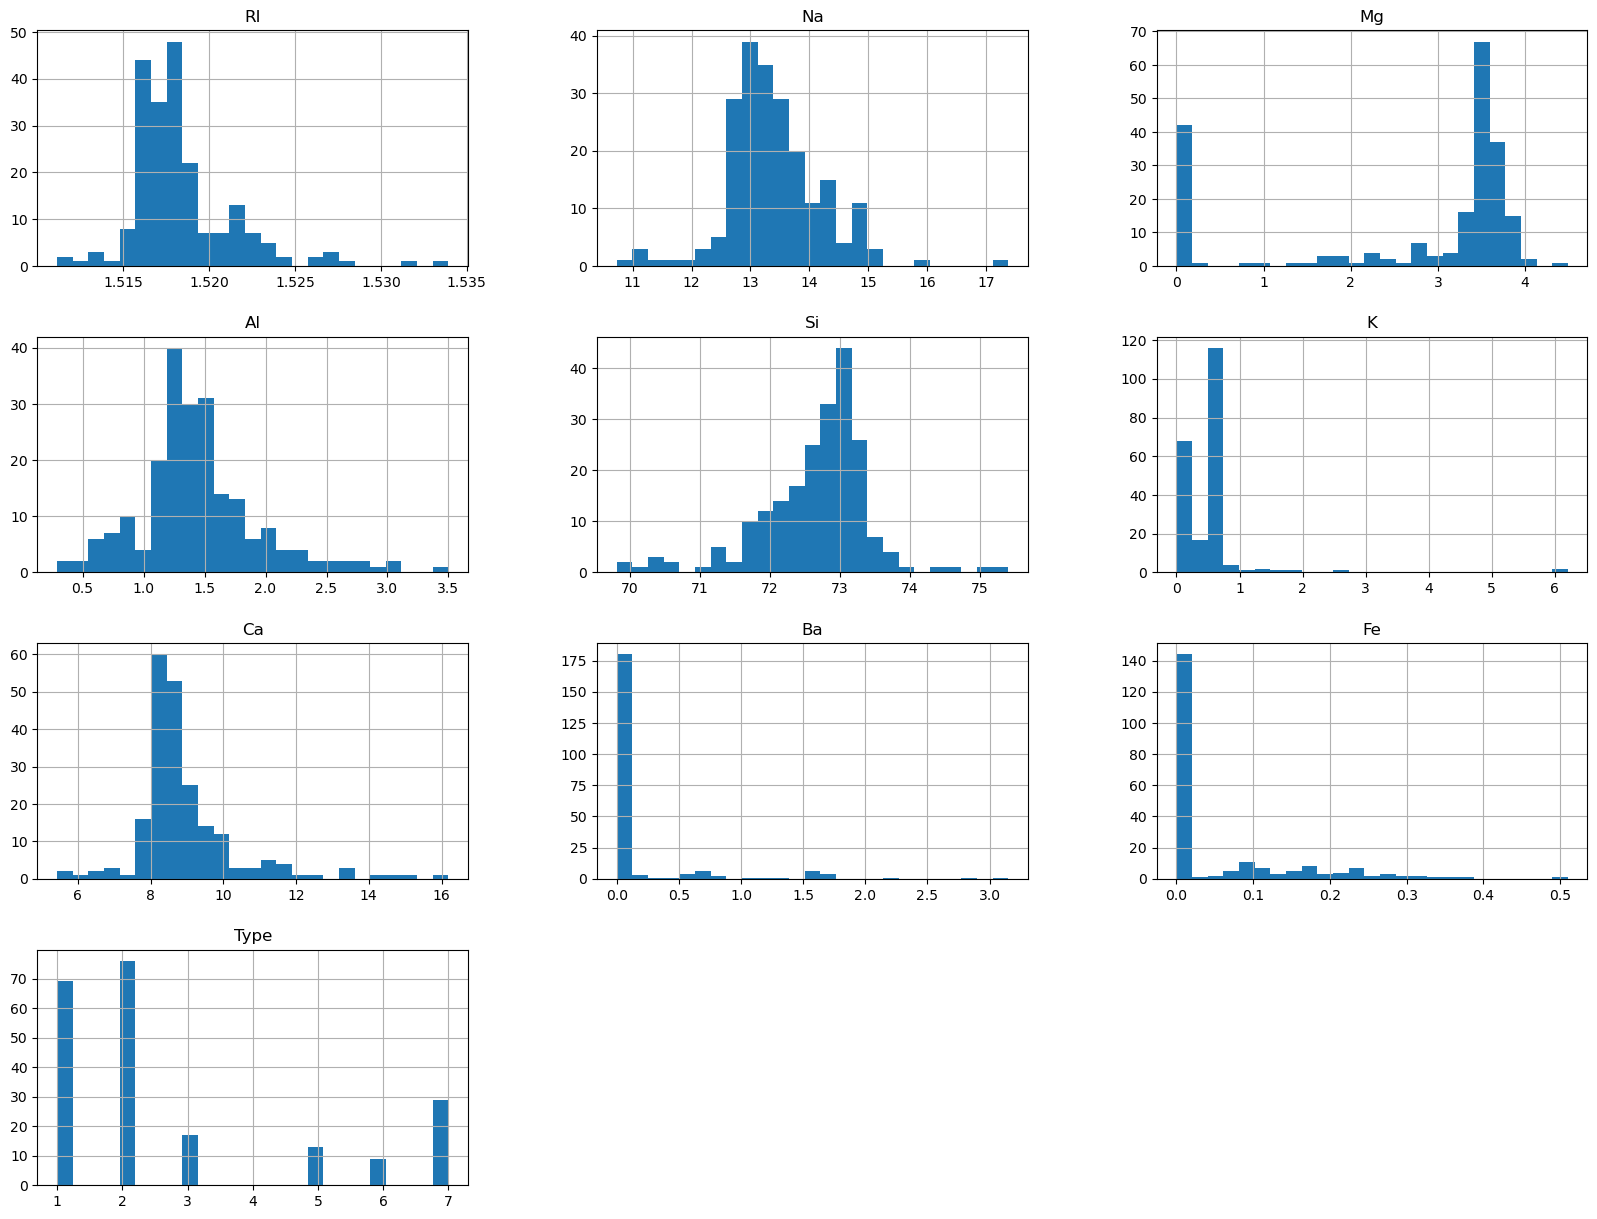

In [12]:
glass.hist(bins=25, figsize=(20,15))
plt.show()

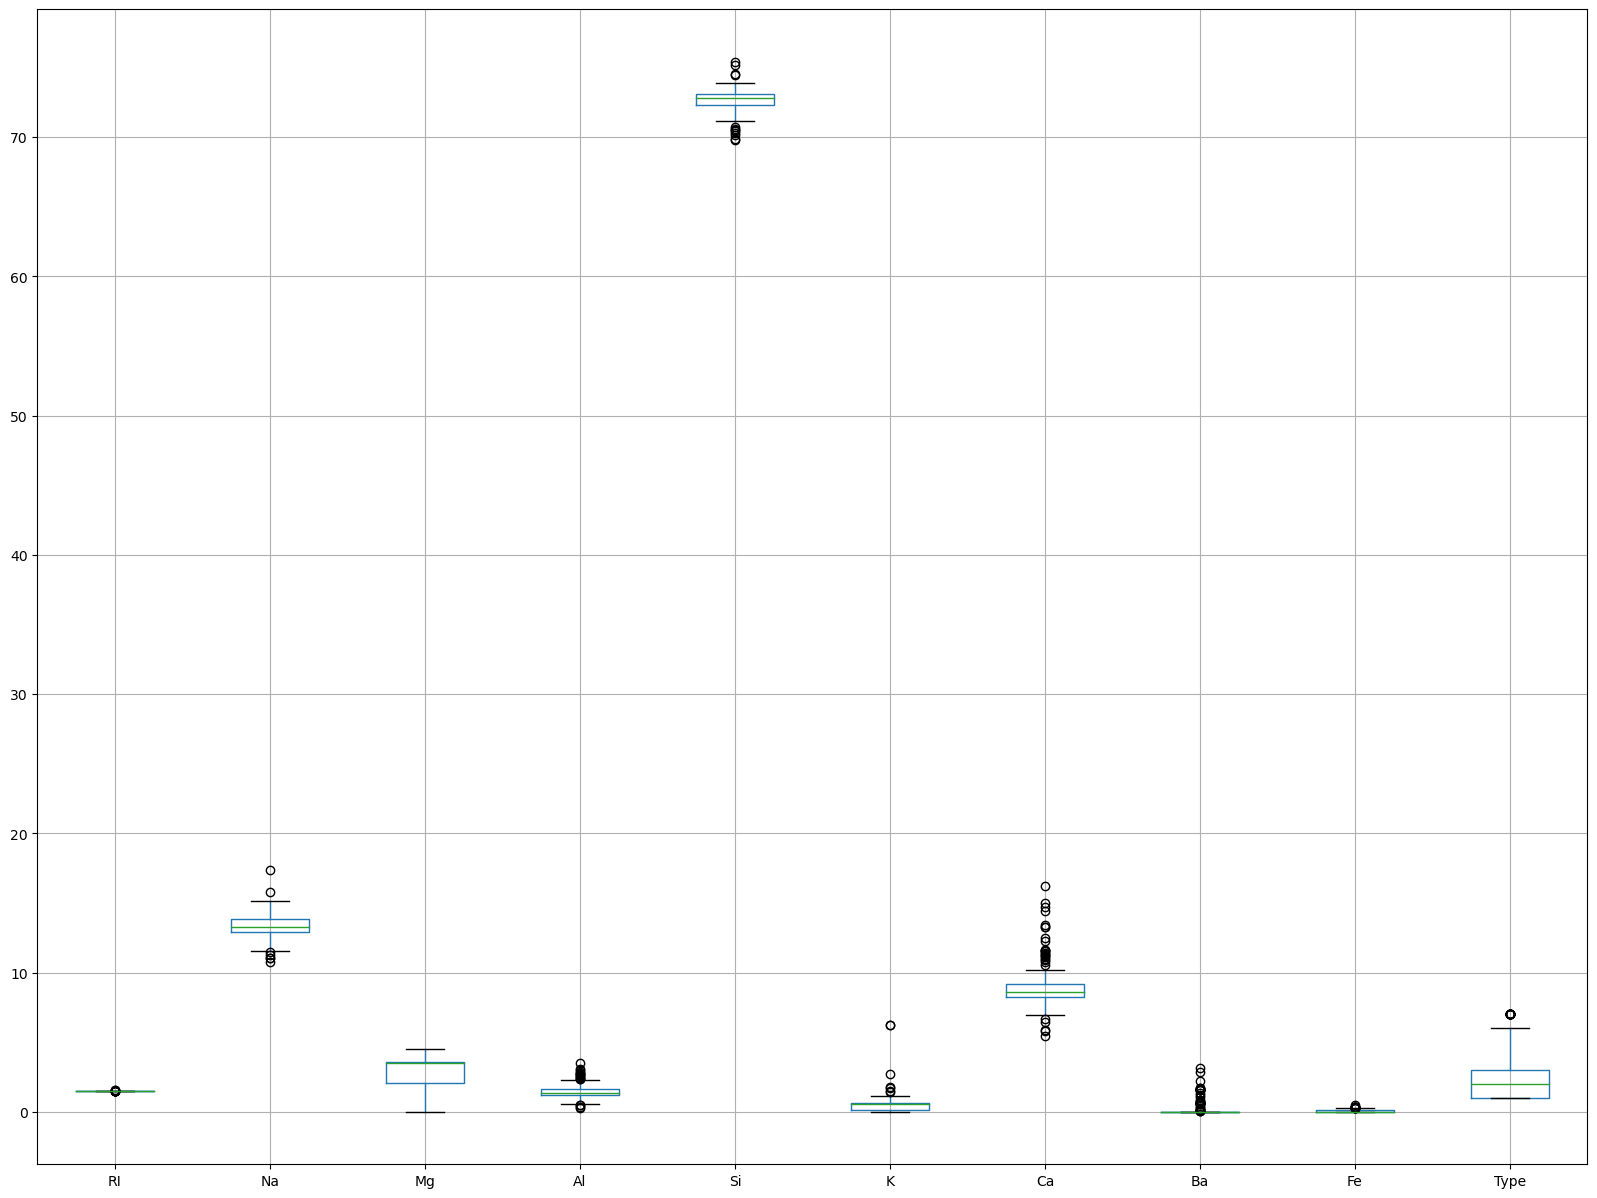

In [13]:
glass.boxplot( figsize=(20,15))
plt.show()

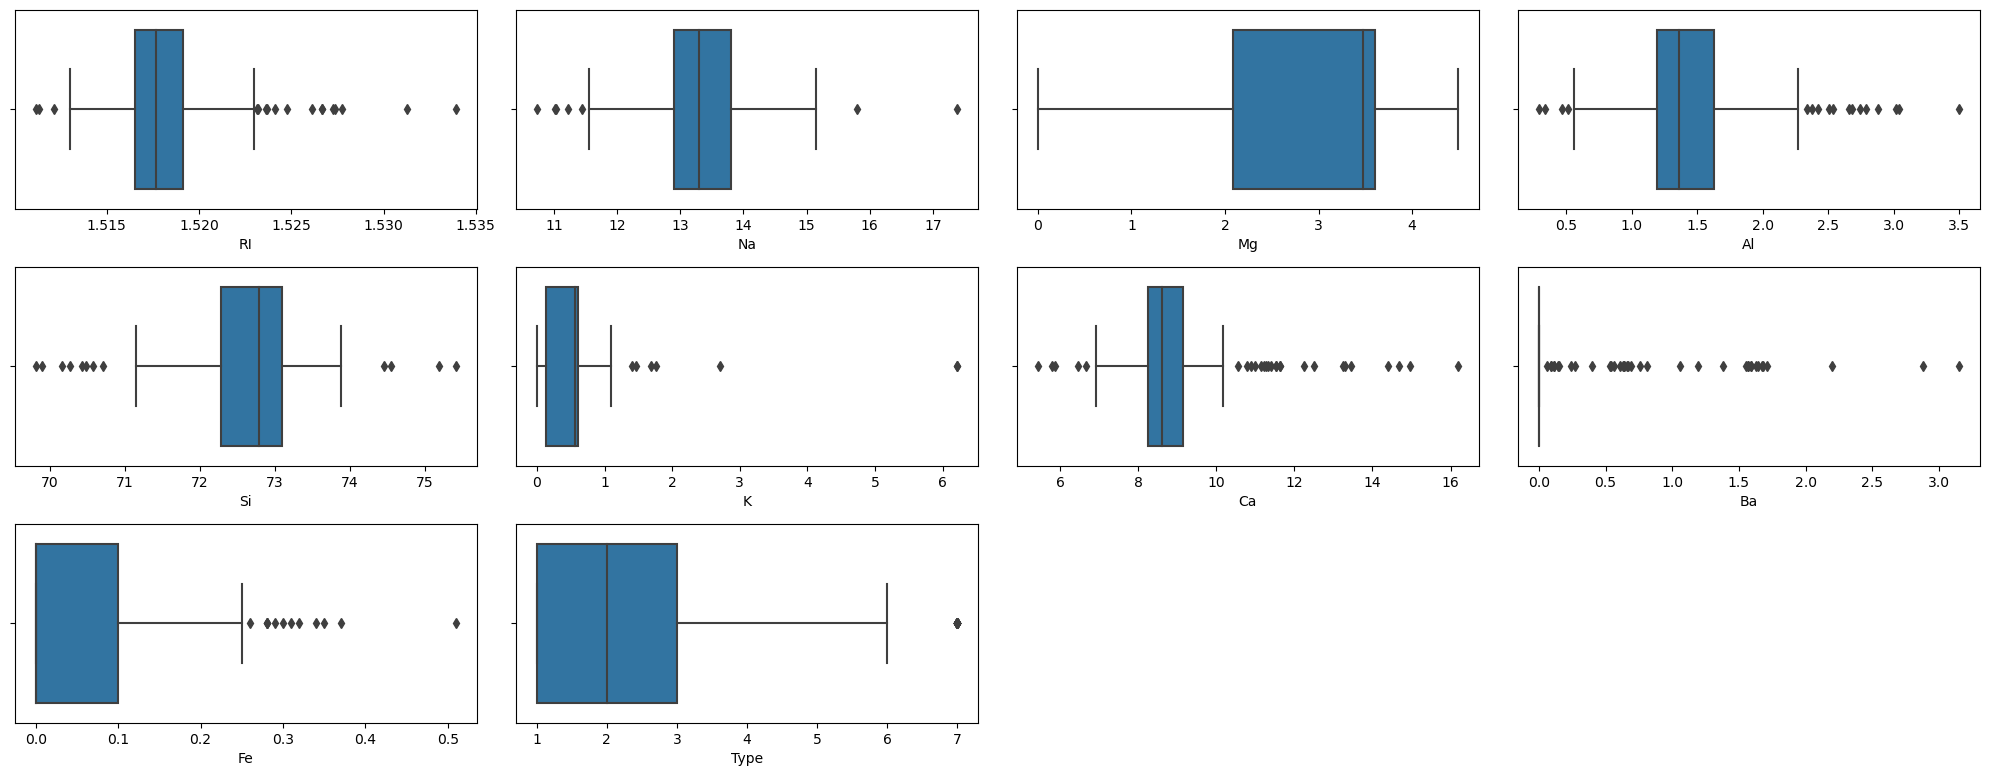

In [14]:
import matplotlib.pyplot as plt
c=4
r=4
col=glass.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(20,10))
for i,co in enumerate(col):
    axis=size.add_subplot(r,c,i+1)
    sns.boxplot(x=glass[co],ax=axis)
size.tight_layout()
plt.show()

In [15]:
#ok lets treat the oulier i am using iqr method
def treatoutlier(df,cols):
    for col in cols:
        
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
    
        upper=Q3+1.5*IQR
        lower=Q1-1.5*IQR
    
        df[col]=np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    
treatoutlier(glass,glass.columns)

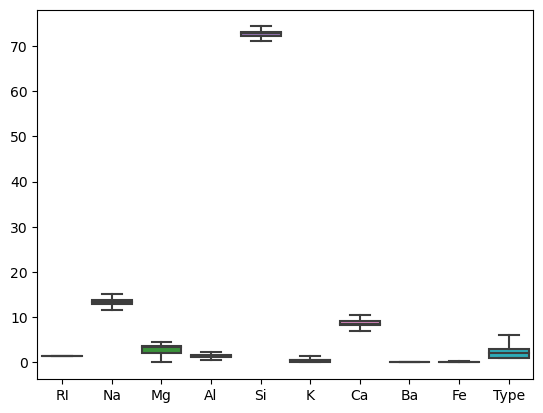

In [16]:
sns.boxplot(data=glass);

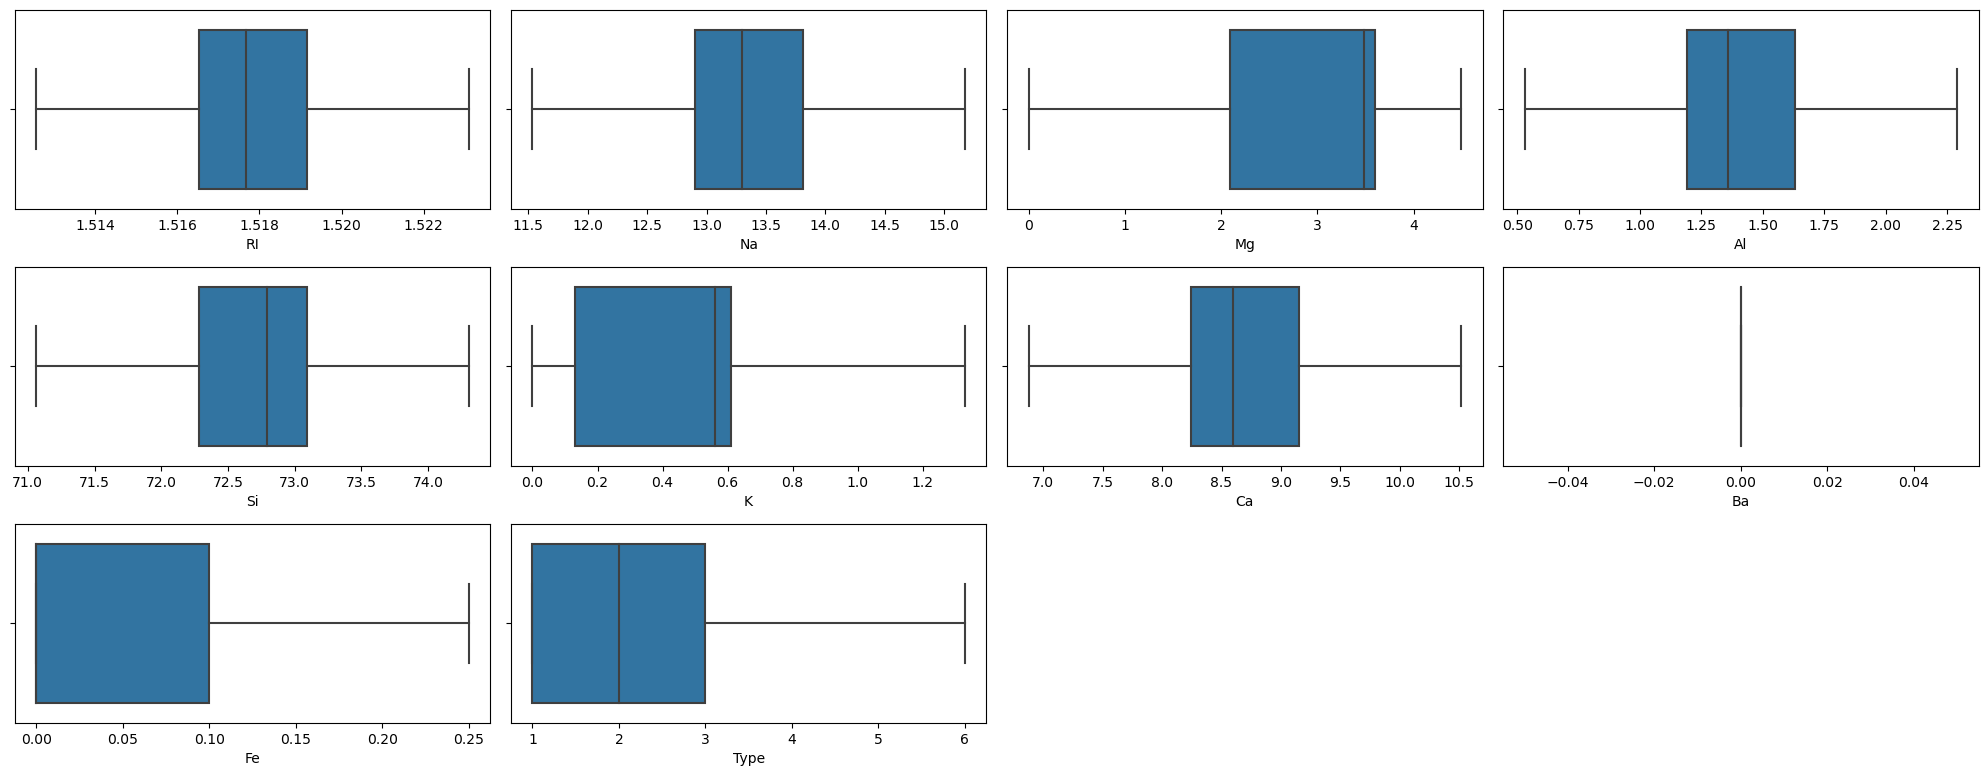

In [17]:
c=4
r=4
col=glass.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(20,10))
for i,co in enumerate(col):
    axis=size.add_subplot(r,c,i+1)
    sns.boxplot(x=glass[co],ax=axis)
size.tight_layout()
plt.show()

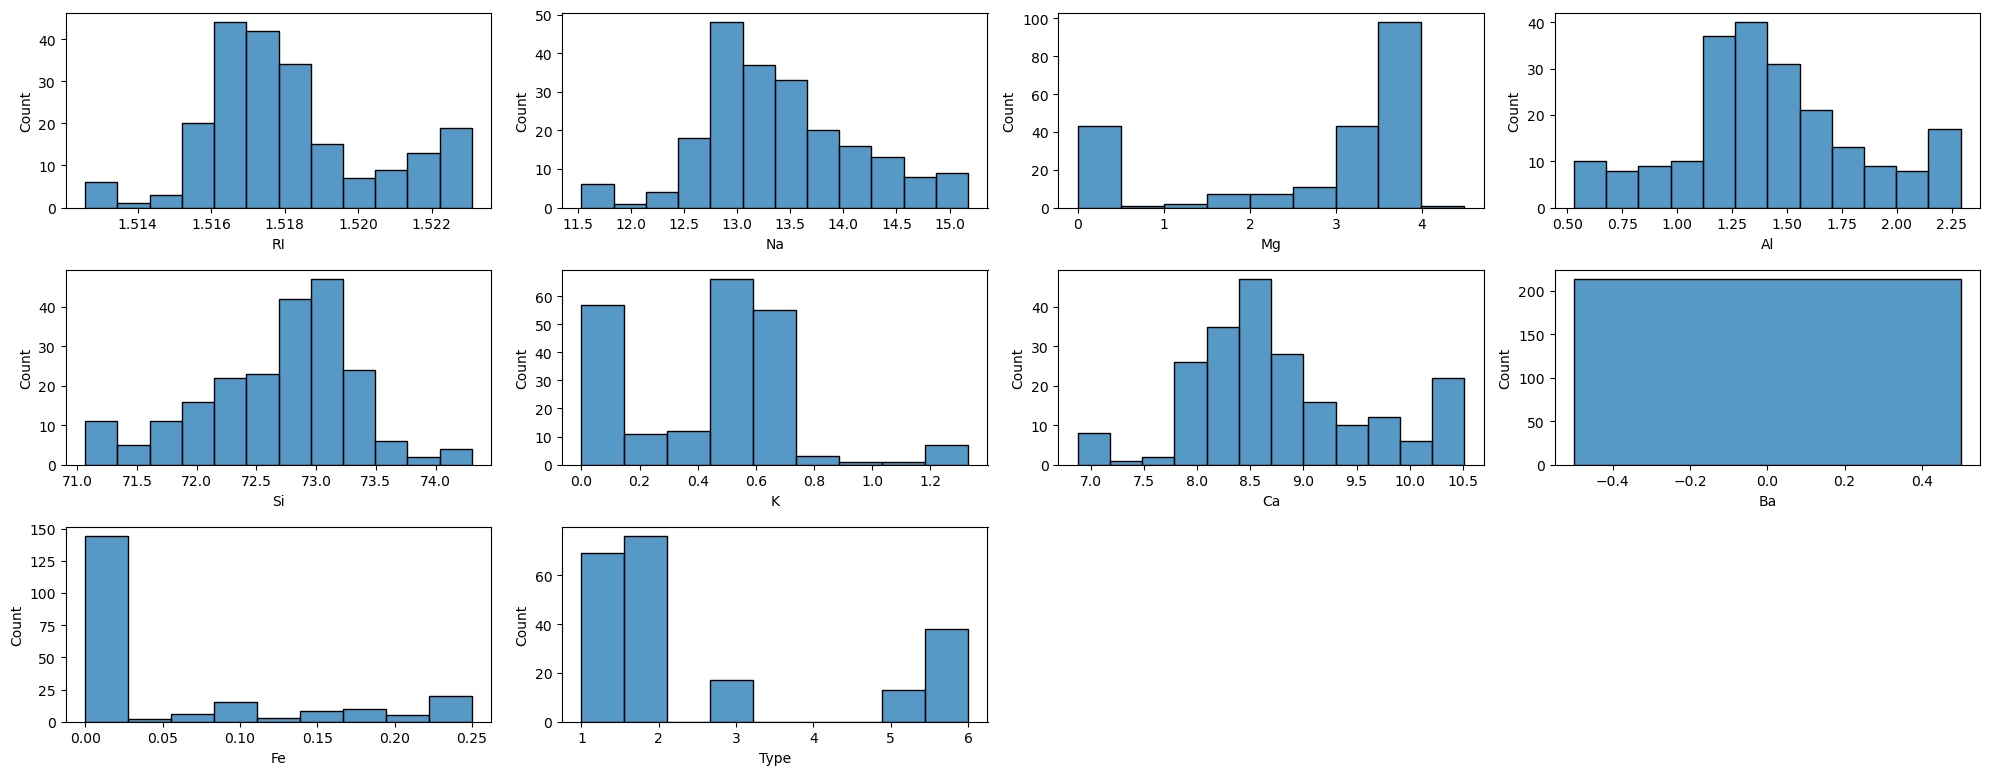

In [18]:
c=4
r=4
col=glass.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(20,10))
for i,co in enumerate(col):
    axis=size.add_subplot(r,c,i+1)
    sns.histplot(x=glass[co],ax=axis)
size.tight_layout()
plt.show()

<AxesSubplot:xlabel='Type', ylabel='Density'>

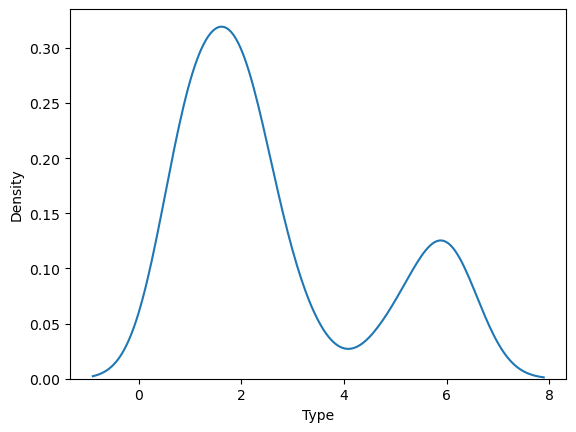

In [19]:
sns.kdeplot(glass.Type)

In [20]:
glass.Type.unique()

array([1., 2., 3., 5., 6.])

In [21]:
glass_df = glass.iloc[:,0:9]
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [22]:
array = glass_df.values
array

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  0.     ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  0.     ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  0.     ,  0.     ]])

In [23]:
scaled = StandardScaler()
X = scaled.fit_transform(array)

In [24]:
X

array([[ 1.21609303,  0.3226798 ,  1.25723832, ..., -0.04441938,
         0.        , -0.62110164],
       [-0.22720718,  0.6605561 ,  0.63931074, ..., -1.11573287,
         0.        , -0.62110164],
       [-0.83424227,  0.17401423,  0.6045957 , ..., -1.17395642,
         0.        , -0.62110164],
       ...,
       [ 1.06327301,  1.29576355, -1.86017161, ..., -0.40540545,
         0.        , -0.62110164],
       [-0.69415725,  1.32279365, -1.86017161, ..., -0.3588266 ,
         0.        , -0.62110164],
       [-0.43945721,  1.12006787, -1.86017161, ..., -0.19580063,
         0.        , -0.62110164]])

In [25]:
glass_df_knn = pd.DataFrame(X, columns=glass_df.columns[:])
glass_df_knn

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.216093,0.322680,1.257238,-0.773927,-1.361078,-1.253536,-0.044419,0.0,-0.621102
1,-0.227207,0.660556,0.639311,-0.154741,0.086641,0.124799,-1.115733,0.0,-0.621102
2,-0.834242,0.174014,0.604596,0.273927,0.482859,-0.170559,-1.173956,0.0,-0.621102
3,-0.205982,-0.258467,0.701798,-0.321445,-0.096228,0.420156,-0.661589,0.0,-0.621102
4,-0.307862,-0.177377,0.653197,-0.440519,0.620012,0.354521,-0.836260,0.0,-0.621102
...,...,...,...,...,...,...,...,...,...
208,-0.813017,0.998432,-1.860172,2.060042,-0.096228,-1.187901,0.456303,0.0,-0.621102
209,-0.549827,2.052606,-1.860172,1.345596,0.589533,-1.450441,-0.451984,0.0,-0.621102
210,1.063273,1.295764,-1.860172,1.417041,1.138143,-1.450441,-0.405405,0.0,-0.621102
211,-0.694157,1.322794,-1.860172,1.226522,1.427687,-1.450441,-0.358827,0.0,-0.621102


In [26]:
x = glass_df_knn
y = glass['Type']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [28]:
x_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
14,-0.218717,-1.069371,0.632368,-0.273815,0.940034,0.452974,-0.335537,0.0,-0.621102
186,2.101176,0.052379,0.458793,-0.464334,-0.446729,0.518609,0.048738,0.0,-0.621102
174,1.292503,-0.582829,-1.631052,0.202482,1.092426,-1.023814,2.010872,0.0,2.303183
56,0.040228,-0.717979,0.555995,-0.321445,0.421903,0.518609,-0.417050,0.0,-0.621102
183,-2.364565,2.397240,-1.860172,-2.131375,2.486808,-1.450441,-2.227803,0.0,-0.621102
...,...,...,...,...,...,...,...,...,...
203,-0.838487,2.093152,-1.860172,2.012413,0.955273,-1.450441,-0.090998,0.0,-0.621102
137,-0.596522,-0.826100,0.583767,0.273927,1.046708,0.715514,-1.034220,0.0,-0.621102
72,-0.779057,-0.082772,0.618482,0.345372,0.299990,0.551426,-1.045865,0.0,-0.621102
140,0.154843,-0.271982,0.660140,-0.845372,0.239033,0.420156,-0.440340,0.0,1.367412


In [29]:
y_train

14     1.0
187    6.0
175    5.0
57     1.0
184    6.0
      ... 
204    6.0
138    2.0
73     2.0
141    2.0
37     1.0
Name: Type, Length: 149, dtype: float64

### KNN Model Building

In [30]:
# using KNN with KFold building a model
num_folds = 10
kfold = KFold(n_splits=10)

In [31]:
kfold

KFold(n_splits=10, random_state=None, shuffle=False)

In [32]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
y_pred = model.predict(x_test)
pd.Series(y_pred).value_counts()

1.0    27
2.0    22
6.0     9
3.0     4
5.0     2
dtype: int64

In [34]:
y_test.value_counts()

1.0    23
2.0    22
6.0    10
3.0     7
5.0     2
Name: Type, dtype: int64

In [35]:
pd.crosstab(y_test, y_pred)

col_0,1.0,2.0,3.0,5.0,6.0
Type,,,,,
1.0,19,1,3,0,0
2.0,3,18,0,0,1
3.0,5,1,1,0,0
5.0,0,0,0,2,0
6.0,0,2,0,0,8


<AxesSubplot:xlabel='col_0', ylabel='Type'>

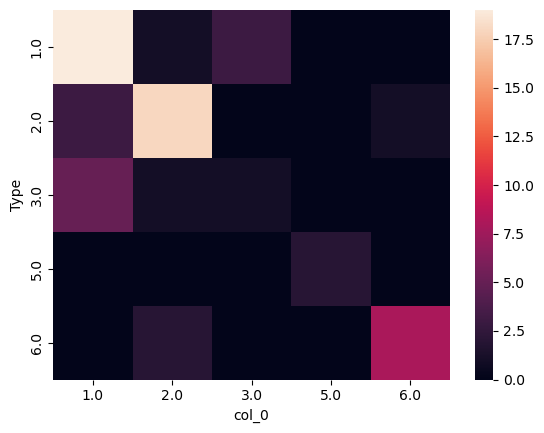

In [36]:
sns.heatmap(pd.crosstab(y_test, y_pred))

In [37]:
accuracy_score(y_test,y_pred)*100

75.0

### Grid Search for Algorithm Tuning

In [38]:
from sklearn.model_selection import GridSearchCV
n_neighbors = np.array([i for i in range(1,30)])
param_grid = dict(n_neighbors = n_neighbors)

In [39]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [40]:
print(grid.best_score_)
print(grid.best_params_)

0.662015503875969
{'n_neighbors': 2}


### Visualization

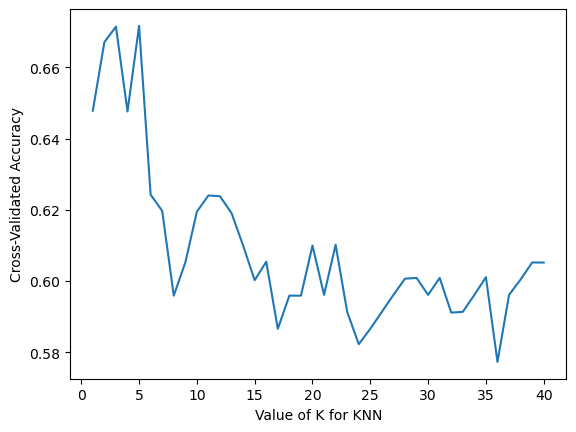

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x,y, cv=10)
    k_scores.append(scores.mean())

# plot to see clearly
plt.plot(k_range, k_scores)


plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [42]:
test_accuracy=accuracy_score(y_test,y_pred)*100
test_accuracy

75.0

In [43]:
print("Best accuracy is {} with K = {}".format(test_accuracy, grid.best_params_))

Best accuracy is 75.0 with K = {'n_neighbors': 2}
